In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [6]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [7]:
# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
# Only Data Analysis jobs
df = df[df['job_title_short'] == 'Data Analyst'].copy()

**Ex_1: jobs breakdown visualization (work from home/hybrid-remote)**

In [18]:
# Count true and false values
work_from_home = df['job_work_from_home'].value_counts()

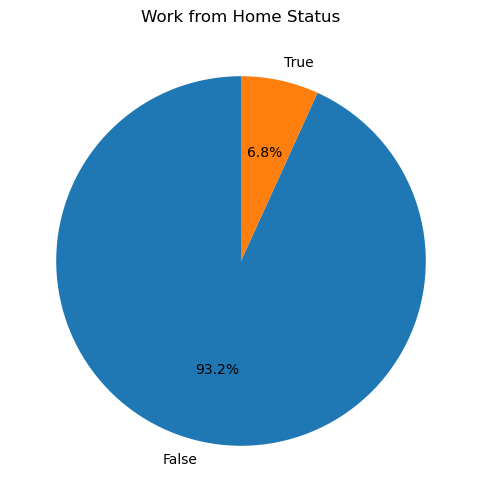

In [19]:
# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Home Status')
plt.show()

***Ex_2 ; pie chart for boolean job_no_degree_mention and job_health_insurance***

In [20]:
# Count True and False Values
job_no_degree = df['job_no_degree_mention'].value_counts()

In [21]:
job_health_insurance = df['job_health_insurance'].value_counts()

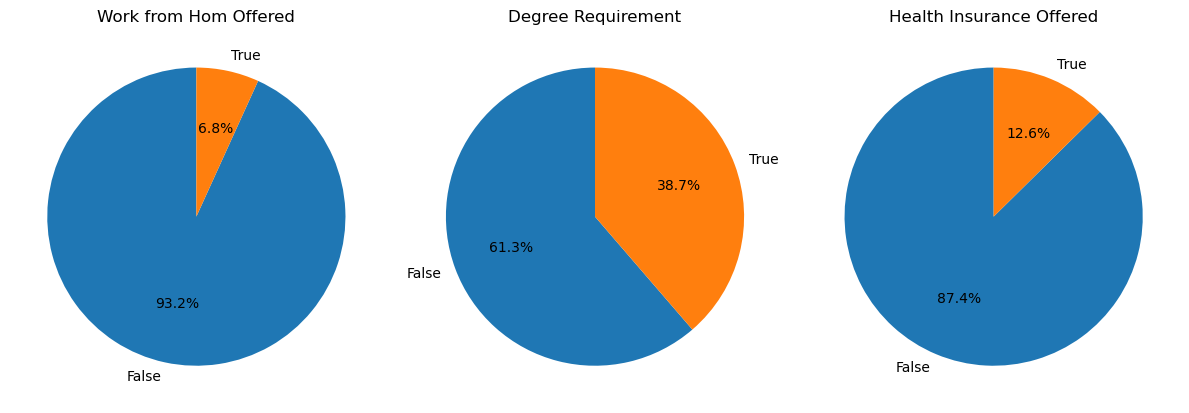

In [22]:
# Set Plot Figure
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Data Analyst Salaries
plt.subplot(1, 3, 1)
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')

# Job No Degree
plt.subplot(1, 3, 2)
plt.pie(job_no_degree, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

# Job Health Insurance
plt.subplot(1, 3, 3)
plt.pie(job_health_insurance, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()

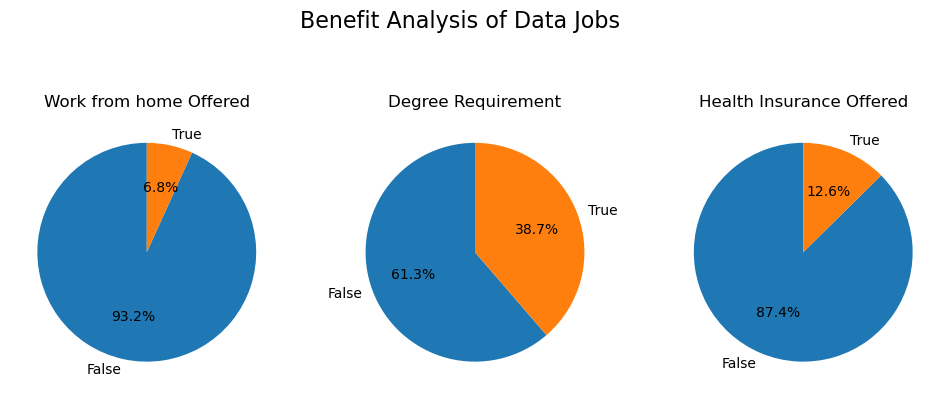

In [26]:
# ALT OPTION
dict_column ={
    'job_work_from_home': 'Work from home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle = 90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()